# Project Two - Ames Housing 

## Problem Statement

To determine the appropriate predictors that affect housing prices and use linear regression model to predict the housing prices as accurately as possible. 

## Executive Summary

This project aims to understand the factors that affect the sales price of houses in Ames, Iowa using data collected by Ames Assessor’s Office from 2006 to 2010. This dataset has 2920 rows and 82 variables with "23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers)"(1). The objective of this project is to determine the appropriate predictors and use linear regression to assess the housing prices using these predictors. 

The Ames Accessor's Office's responsibility is to assess constituents' properties as accurately as possible as new housing developments emerge, real estate propertities transfer, and the value of houses appreciates or depreciates. The accessor's office holds key decision making power in deciding the value of real estates that impact property taxes and real estate transfer taxes that are crucial to Ames' tax revenues and affect residents' financial decisions.

The modeling process for linear regression starts with data cleaning. Provided below is the sample data dictionary that helps readers to walk through the project and use as a guide in the data cleaning process. During the data cleaning process, readers can find the codes for each ordinal category labeled using conventional such as renaming "Excellent" to 4 and "Poor" to 0. After categorizing data, readers can find graphs that visualize the relationship between each variable and the sales price of houses. Lastly, a linear regression model is fitted to the data. 

The above process is not a one-way street, rather an iterative process. The following table of contents separated each section to help readers to refer back to another step conveniently. 

## Table of Contents

-[Importing Data](#Importing-Data)<br>
-[Cleaning Data](#Cleaning-Data)<br>
-[Categorizing Ordinal Data](#Categorizing-Ordinal-Data)<br>
-[Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
-[Linear Regression Modeling](#Linear-Regression-Modeling)<br>
-[Lasso](#Lasso)<br>
-[Hypothesis Testing](#Hypothesis-Testing)<br>
-[Conclusion-and-Recommendation](#Conclusion-and-Recommendation)<br>

## Importing Data

In [702]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
import statsmodels.api as sm 

In [2]:
train_data = pd.read_csv('./datasets/train.csv')

In [3]:
test_data = pd.read_csv('./datasets/test.csv')

In [4]:
train_data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
train_data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [6]:
train_data.shape

(2051, 81)

## Cleaning Data

In [7]:
test_na_list = [i for i in test_data.columns if test_data[i].isna().sum() > 0]
test_na_list_nums = [test_data[i].isna().sum() for i in test_na_list]
test_na = list(zip(test_na_list, test_na_list_nums))

In [8]:
test_na

[('Lot Frontage', 160),
 ('Alley', 820),
 ('Mas Vnr Type', 1),
 ('Mas Vnr Area', 1),
 ('Bsmt Qual', 25),
 ('Bsmt Cond', 25),
 ('Bsmt Exposure', 25),
 ('BsmtFin Type 1', 25),
 ('BsmtFin Type 2', 25),
 ('Electrical', 1),
 ('Fireplace Qu', 422),
 ('Garage Type', 44),
 ('Garage Yr Blt', 45),
 ('Garage Finish', 45),
 ('Garage Qual', 45),
 ('Garage Cond', 45),
 ('Pool QC', 874),
 ('Fence', 706),
 ('Misc Feature', 837)]

Train Data

In [9]:
train_na_list = [i for i in train_data.columns if train_data[i].isna().sum() > 0]
train_na_list_nums = [train_data[i].isna().sum() for i in train_na_list]
train_na = list(zip(train_na_list, train_na_list_nums))

In [10]:
train_na

[('Lot Frontage', 330),
 ('Alley', 1911),
 ('Mas Vnr Type', 22),
 ('Mas Vnr Area', 22),
 ('Bsmt Qual', 55),
 ('Bsmt Cond', 55),
 ('Bsmt Exposure', 58),
 ('BsmtFin Type 1', 55),
 ('BsmtFin SF 1', 1),
 ('BsmtFin Type 2', 56),
 ('BsmtFin SF 2', 1),
 ('Bsmt Unf SF', 1),
 ('Total Bsmt SF', 1),
 ('Bsmt Full Bath', 2),
 ('Bsmt Half Bath', 2),
 ('Fireplace Qu', 1000),
 ('Garage Type', 113),
 ('Garage Yr Blt', 114),
 ('Garage Finish', 114),
 ('Garage Cars', 1),
 ('Garage Area', 1),
 ('Garage Qual', 114),
 ('Garage Cond', 114),
 ('Pool QC', 2042),
 ('Fence', 1651),
 ('Misc Feature', 1986)]

### Test Data

In [11]:
t1 = test_data['Mas Vnr Type'].isnull() == True
test_data.loc[t1]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
865,868,907260030,60,RL,70.0,8749,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,11,2009,WD


#### Bsmt fin 1(1)

In [12]:
bsmt_fin_1 = train_data['BsmtFin SF 1'].isna() == True
train_data.loc[bsmt_fin_1]


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [13]:
train_data.drop(index=1327, inplace=True)


#### bsmt full bath (1)

In [14]:
bsmt_full_bath= train_data['Bsmt Full Bath'].isna() == True
train_data.loc[bsmt_full_bath]


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2008,WD,284700


In [15]:
train_data.drop(index=616, inplace=True)

#### garage cars (1)

In [16]:
garage_cars= train_data['Garage Cars'].isna() == True
train_data.loc[garage_cars]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [17]:
train_data.drop(index=1712, inplace=True)

In [18]:
test_data['Mas Vnr Type'].fillna('NA', inplace=True)

In [19]:
test_data['Mas Vnr Type'][865]

'NA'

In [20]:
t2 = test_data['Mas Vnr Area'].isnull() == True
test_data.loc[t2]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
865,868,907260030,60,RL,70.0,8749,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,11,2009,WD


In [21]:
test_data['Mas Vnr Area'].fillna(0, inplace=True)

In [22]:
test_data['Mas Vnr Area'][865]

0.0

In [23]:
t3 = test_data['Bsmt Qual'].isnull() == True
test_data.loc[t3]


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
15,2089,905480180,20,RL,60.0,9060,Pave,NaN,Reg,Lvl,...,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD
37,2071,905228020,20,RL,NaN,9000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,5,2007,WD
76,971,923202060,20,RL,100.0,21750,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,GdPrv,NaN,0,11,2009,WD
78,1887,534276290,20,RL,NaN,8339,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,MnPrv,Shed,1200,7,2007,WD
112,2005,902427180,80,RM,76.0,11800,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,5,2007,WD
144,1507,908250040,50,RL,57.0,8050,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2008,WD
189,899,908250030,20,RL,74.0,10206,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2009,WD
205,2623,535451210,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2006,WD
278,1269,535451230,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2008,WD
291,2488,532351150,90,RM,68.0,8927,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD


#### Bsmt Qual [Ordinal]

In [24]:
test_data['Bsmt Qual'].fillna(0, inplace=True)

In [25]:
test_data['Bsmt Qual'].isnull().sum()

0

In [26]:
test_data.groupby('Bsmt Qual').count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Bsmt Qual,,,,,,,,,,,,,,,,,,,,,
0,25,25,25,25,20,25,25,1,25,25,...,25,25,25,0,4,2,25,25,25,25
Ex,73,73,73,73,69,73,73,1,73,73,...,73,73,73,2,2,0,73,73,73,73
Fa,28,28,28,28,28,28,28,6,28,28,...,28,28,28,0,7,1,28,28,28,28
Gd,355,355,355,355,266,355,355,14,355,355,...,355,355,355,0,34,13,355,355,355,355
Po,1,1,1,1,1,1,1,0,1,1,...,1,1,1,0,0,0,1,1,1,1
TA,396,396,396,396,334,396,396,36,396,396,...,396,396,396,2,125,25,396,396,396,396


#### Bsmt Cond [Ordinal]

In [27]:
test_data['Bsmt Cond'].isnull().sum()

25

In [28]:
test_data['Bsmt Cond'].fillna(0, inplace=True)

In [29]:
test_data['Bsmt Cond'].isnull().sum()

0

In [30]:
test_data.groupby('Bsmt Cond').count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Bsmt Cond,,,,,,,,,,,,,,,,,,,,,
0,25,25,25,25,20,25,25,1,25,25,...,25,25,25,0,4,2,25,25,25,25
Fa,39,39,39,39,38,39,39,9,39,39,...,39,39,39,0,6,0,39,39,39,39
Gd,33,33,33,33,24,33,33,2,33,33,...,33,33,33,0,5,3,33,33,33,33
TA,781,781,781,781,636,781,781,46,781,781,...,781,781,781,4,157,36,781,781,781,781


#### Bsmt Exposure [Ordinal]

In [31]:
test_data['Bsmt Exposure'].fillna(0, inplace=True)

In [32]:
test_data['Bsmt Exposure'].isnull().sum()

0

Test Data

In [33]:
test_data.groupby('Bsmt Exposure').count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Bsmt Exposure,,,,,,,,,,,,,,,,,,,,,
0,25,25,25,25,20,25,25,1,25,25,...,25,25,25,0,4,2,25,25,25,25
Av,130,130,130,130,106,130,130,2,130,130,...,130,130,130,1,21,5,130,130,130,130
Gd,80,80,80,80,58,80,80,0,80,80,...,80,80,80,1,9,4,80,80,80,80
Mn,76,76,76,76,60,76,76,3,76,76,...,76,76,76,0,17,5,76,76,76,76
No,567,567,567,567,474,567,567,52,567,567,...,567,567,567,2,121,25,567,567,567,567


#### BsmtFin Type 1 [Ordinal]

In [34]:
test_data['BsmtFin Type 1'].fillna(0, inplace=True)

In [35]:
test_data['BsmtFin Type 1'].isnull().sum()

0

In [36]:
test_data.groupby('BsmtFin Type 1').count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
BsmtFin Type 1,,,,,,,,,,,,,,,,,,,,,
0,25,25,25,25,20,25,25,1,25,25,...,25,25,25,0,4,2,25,25,25,25
ALQ,136,136,136,136,102,136,136,0,136,136,...,136,136,136,0,41,10,136,136,136,136
BLQ,69,69,69,69,52,69,69,4,69,69,...,69,69,69,0,16,5,69,69,69,69
GLQ,243,243,243,243,197,243,243,4,243,243,...,243,243,243,3,22,9,243,243,243,243
LwQ,52,52,52,52,44,52,52,5,52,52,...,52,52,52,0,10,1,52,52,52,52
Rec,105,105,105,105,84,105,105,10,105,105,...,105,105,105,0,37,6,105,105,105,105
Unf,248,248,248,248,219,248,248,34,248,248,...,248,248,248,1,42,8,248,248,248,248


#### BsmtFin Type 2 [Ordinal]

In [37]:
test_data['BsmtFin Type 2'].fillna(0, inplace=True)

In [38]:
test_data['BsmtFin Type 1'].isnull().sum()

0

In [39]:
test_data.groupby('BsmtFin Type 2').count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
BsmtFin Type 2,,,,,,,,,,,,,,,,,,,,,
0,25,25,25,25,20,25,25,1,25,25,...,25,25,25,0,4,2,25,25,25,25
ALQ,18,18,18,18,9,18,18,0,18,18,...,18,18,18,0,9,1,18,18,18,18
BLQ,20,20,20,20,16,20,20,1,20,20,...,20,20,20,0,10,4,20,20,20,20
GLQ,11,11,11,11,9,11,11,0,11,11,...,11,11,11,0,2,0,11,11,11,11
LwQ,29,29,29,29,22,29,29,0,29,29,...,29,29,29,1,8,2,29,29,29,29
Rec,26,26,26,26,20,26,26,3,26,26,...,26,26,26,0,8,1,26,26,26,26
Unf,749,749,749,749,622,749,749,53,749,749,...,749,749,749,3,131,31,749,749,749,749


#### Electrical

In [40]:
ele = test_data['Electrical'].isnull() == True

In [41]:
test_data['Electrical'].fillna('NA', inplace=True)

In [42]:
test_data['Electrical'].isnull().sum()

0

#### Misc Feature

In [43]:
mis = test_data['Misc Feature'].isnull() == True

In [44]:
test_data['Misc Feature'].fillna('NA', inplace=True)

In [45]:
test_data['Electrical'].isnull().sum()

0

#### Alley

In [46]:
test_data.groupby(['Alley']).count()


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Alley,,,,,,,,,,,,,,,,,,,,,
Grvl,35,35,35,35,33,35,35,35,35,35,...,35,35,35,0,10,35,35,35,35,35
Pave,23,23,23,23,20,23,23,23,23,23,...,23,23,23,0,3,23,23,23,23,23


In [47]:
test_data['Alley'].fillna('NA', inplace=True)


In [48]:
test_data.groupby(['Alley']).count()


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Alley,,,,,,,,,,,,,,,,,,,,,
Grvl,35,35,35,35,33,35,35,35,35,35,...,35,35,35,0,10,35,35,35,35,35
NA,820,820,820,820,665,820,820,820,820,820,...,820,820,820,4,159,820,820,820,820,820
Pave,23,23,23,23,20,23,23,23,23,23,...,23,23,23,0,3,23,23,23,23,23


In [49]:
test_data['Alley'].isnull().sum()


0

#### Garage Type [Nominal]

In [50]:
test_data['Garage Type'].fillna('NA', inplace=True)

In [51]:
test_data['Garage Type'].isnull().sum()

0

In [52]:
test_data.groupby('Garage Type').count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Garage Type,,,,,,,,,,,,,,,,,,,,,
2Types,4,4,4,4,3,4,4,4,4,4,...,4,4,4,0,1,4,4,4,4,4
Attchd,518,518,518,518,402,518,518,518,518,518,...,518,518,518,3,89,518,518,518,518,518
Basment,9,9,9,9,9,9,9,9,9,9,...,9,9,9,0,1,9,9,9,9,9
BuiltIn,53,53,53,53,43,53,53,53,53,53,...,53,53,53,0,4,53,53,53,53,53
CarPort,4,4,4,4,4,4,4,4,4,4,...,4,4,4,0,0,4,4,4,4,4
Detchd,246,246,246,246,218,246,246,246,246,246,...,246,246,246,1,70,246,246,246,246,246
NA,44,44,44,44,39,44,44,44,44,44,...,44,44,44,0,7,44,44,44,44,44


#### Fireplace Qu [Ordinal]

In [53]:
test_data['Fireplace Qu'].fillna(0, inplace=True)

In [54]:
test_data['Fireplace Qu'].isnull().sum()

0

In [55]:
test_data.groupby('Fireplace Qu').count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Fireplace Qu,,,,,,,,,,,,,,,,,,,,,
0,422,422,422,422,362,422,422,422,422,422,...,422,422,422,0,96,422,422,422,422,422
Ex,12,12,12,12,12,12,12,12,12,12,...,12,12,12,1,1,12,12,12,12,12
Fa,16,16,16,16,13,16,16,16,16,16,...,16,16,16,0,5,16,16,16,16,16
Gd,220,220,220,220,184,220,220,220,220,220,...,220,220,220,1,30,220,220,220,220,220
Po,15,15,15,15,14,15,15,15,15,15,...,15,15,15,1,5,15,15,15,15,15
TA,193,193,193,193,133,193,193,193,193,193,...,193,193,193,1,35,193,193,193,193,193


#### Garage Yr Blt

In [56]:
test_data['Garage Yr Blt'].median()

1978.0

In [57]:
test_data['Garage Yr Blt'].fillna(1978, inplace=True)

In [58]:
test_data['Garage Yr Blt'].isnull().sum()

0

#### Garage Finish [Ordinal]

In [59]:
test_data['Garage Finish'].fillna(0, inplace=True)

In [60]:
test_data['Garage Finish'].isnull().sum()

0

In [61]:
test_data.groupby(['Garage Finish']).count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Garage Finish,,,,,,,,,,,,,,,,,,,,,
0,45,45,45,45,40,45,45,45,45,45,...,45,45,45,0,8,45,45,45,45,45
Fin,218,218,218,218,177,218,218,218,218,218,...,218,218,218,2,23,218,218,218,218,218
RFn,233,233,233,233,183,233,233,233,233,233,...,233,233,233,0,34,233,233,233,233,233
Unf,382,382,382,382,318,382,382,382,382,382,...,382,382,382,2,107,382,382,382,382,382


#### Garage Qual [Ordinal]

In [62]:
test_data['Garage Qual'].fillna(0, inplace=True)

In [63]:
test_data['Garage Qual'].isnull().sum()

0

In [64]:
test_data.groupby(['Garage Qual']).count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Garage Qual,,,,,,,,,,,,,,,,,,,,,
0,45,45,45,45,40,45,45,45,45,45,...,45,45,45,0,8,45,45,45,45,45
Fa,42,42,42,42,40,42,42,42,42,42,...,42,42,42,0,12,42,42,42,42,42
Gd,6,6,6,6,6,6,6,6,6,6,...,6,6,6,0,1,6,6,6,6,6
Po,3,3,3,3,3,3,3,3,3,3,...,3,3,3,0,1,3,3,3,3,3
TA,782,782,782,782,629,782,782,782,782,782,...,782,782,782,4,150,782,782,782,782,782


#### Garage Cond [Ordinal]

In [65]:
test_data['Garage Cond'].fillna(0, inplace=True)

In [66]:
test_data['Garage Cond'].isnull().sum()

0

In [67]:
test_data.groupby(['Garage Cond']).count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Garage Cond,,,,,,,,,,,,,,,,,,,,,
0,45,45,45,45,40,45,45,45,45,45,...,45,45,45,0,8,45,45,45,45,45
Ex,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,1,1,1,1,1
Fa,27,27,27,27,24,27,27,27,27,27,...,27,27,27,0,3,27,27,27,27,27
Gd,3,3,3,3,2,3,3,3,3,3,...,3,3,3,0,1,3,3,3,3,3
Po,6,6,6,6,5,6,6,6,6,6,...,6,6,6,0,2,6,6,6,6,6
TA,796,796,796,796,646,796,796,796,796,796,...,796,796,796,4,158,796,796,796,796,796


#### Pool QC [Ordinal]

In [68]:
test_data['Pool QC'].fillna(0, inplace=True)

In [69]:
test_data['Pool QC'].isnull().sum()

0

In [70]:
test_data.groupby(['Pool QC']).count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Pool QC,,,,,,,,,,,,,,,,,,,,,
0,874,874,874,874,714,874,874,874,874,874,...,874,874,874,874,170,874,874,874,874,874
Ex,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,2,3,3,3,3,3
TA,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1


#### Fence [Ordinal]

In [71]:
test_data['Fence'].fillna(0, inplace=True)

In [72]:
test_data['Fence'].isnull().sum()

0

In [73]:
test_data.groupby(['Fence']).count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Fence,,,,,,,,,,,,,,,,,,,,,
0,706,706,706,706,574,706,706,706,706,706,...,706,706,706,706,706,706,706,706,706,706
GdPrv,35,35,35,35,26,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
GdWo,32,32,32,32,28,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
MnPrv,103,103,103,103,88,103,103,103,103,103,...,103,103,103,103,103,103,103,103,103,103
MnWw,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


### TRAIN DATA

#### mas vnr type (22)

In [74]:
train_data.groupby('Mas Vnr Type').count()


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Mas Vnr Type,,,,,,,,,,,,,,,,,,,,,
BrkCmn,13,13,13,13,9,13,13,0,13,13,...,13,13,0,7,1,13,13,13,13,13
BrkFace,630,630,630,630,486,630,630,13,630,630,...,630,630,3,112,16,630,630,630,630,630
None,1215,1215,1215,1215,1051,1215,1215,120,1215,1215,...,1215,1215,5,269,46,1215,1215,1215,1215,1215
Stone,168,168,168,168,156,168,168,5,168,168,...,168,168,1,10,2,168,168,168,168,168


#### Mas Vnr Area (22)

In [75]:
mas_vnr_area=train_data['Mas Vnr Area'].isna() == True
train_data.loc[mas_vnr_area]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
22,2393,528142010,60,RL,103.0,12867,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2006,New,344133
41,2383,528110050,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,465000
86,539,531371050,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2009,WD,184900
212,518,528458020,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,10,2009,New,225000
276,2824,908130020,20,RL,75.0,8050,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,117250
338,1800,528458150,60,FV,112.0,12217,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,12,2007,New,310013
431,1455,907251090,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,3,2008,WD,237000
451,1120,528439010,20,RL,87.0,10037,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2008,WD,247000
591,1841,533208040,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,11,2007,New,199900
844,1840,533208030,120,FV,30.0,5330,Pave,Pave,IR2,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,New,207500


In [76]:
train_data.groupby('Mas Vnr Type').mean()['Mas Vnr Area']


Mas Vnr Type
BrkCmn     194.000000
BrkFace    254.630159
None         0.522634
Stone      230.410714
Name: Mas Vnr Area, dtype: float64

In [77]:
train_data.loc[mas_vnr_area,'Mas Vnr Type']


22      NaN
41      NaN
86      NaN
212     NaN
276     NaN
338     NaN
431     NaN
451     NaN
591     NaN
844     NaN
913     NaN
939     NaN
1025    NaN
1244    NaN
1306    NaN
1430    NaN
1434    NaN
1606    NaN
1699    NaN
1815    NaN
1820    NaN
1941    NaN
Name: Mas Vnr Type, dtype: object

Without Masonry Veneer Type, I can't decide what Masonry Veneer Area so I will decide drop all of the NaN Masonry Veneer Type. 

In [78]:
train_data = train_data.dropna(subset=['Mas Vnr Type', 'Mas Vnr Area'], axis = 0)


#### Bsmt Qual [Ordinal]

In [79]:
train_data['Bsmt Qual'].fillna(0, inplace=True)


In [80]:
train_data['Bsmt Qual'].isnull().sum()


0

In [81]:
train_data.groupby('Bsmt Qual').count()


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Bsmt Qual,,,,,,,,,,,,,,,,,,,,,
0,53,53,53,53,44,53,53,1,53,53,...,53,53,1,5,3,53,53,53,53,53
Ex,177,177,177,177,159,177,177,3,177,177,...,177,177,1,2,1,177,177,177,177,177
Fa,60,60,60,60,59,60,60,9,60,60,...,60,60,0,15,3,60,60,60,60,60
Gd,849,849,849,849,688,849,849,39,849,849,...,849,849,4,106,23,849,849,849,849,849
Po,1,1,1,1,1,1,1,0,1,1,...,1,1,0,0,0,1,1,1,1,1
TA,886,886,886,886,751,886,886,86,886,886,...,886,886,3,270,35,886,886,886,886,886


#### Bsmt Cond [Ordinal]

In [82]:
train_data['Bsmt Cond'].isnull().sum()

53

In [83]:
train_data['Bsmt Cond'].fillna(0, inplace=True)

In [84]:
train_data['Bsmt Cond'].isnull().sum()

0

In [85]:
train_data.groupby('Bsmt Cond').count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Bsmt Cond,,,,,,,,,,,,,,,,,,,,,
0,53,53,53,53,44,53,53,1,53,53,...,53,53,1,5,3,53,53,53,53,53
Ex,3,3,3,3,3,3,3,0,3,3,...,3,3,0,2,0,3,3,3,3,3
Fa,65,65,65,65,61,65,65,15,65,65,...,65,65,0,19,2,65,65,65,65,65
Gd,87,87,87,87,77,87,87,4,87,87,...,87,87,0,12,1,87,87,87,87,87
Po,5,5,5,5,4,5,5,1,5,5,...,5,5,0,0,0,5,5,5,5,5
TA,1813,1813,1813,1813,1513,1813,1813,117,1813,1813,...,1813,1813,8,360,59,1813,1813,1813,1813,1813


#### Bsmt Exposure [Ordinal]

In [86]:
train_data['Bsmt Exposure'].fillna(0, inplace=True)

In [87]:
train_data['Bsmt Exposure'].isnull().sum()

0

In [88]:
train_data.groupby('Bsmt Exposure').count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Bsmt Exposure,,,,,,,,,,,,,,,,,,,,,
0,56,56,56,56,47,56,56,1,56,56,...,56,56,1,5,3,56,56,56,56,56
Av,284,284,284,284,238,284,284,3,284,284,...,284,284,2,43,6,284,284,284,284,284
Gd,202,202,202,202,168,202,202,1,202,202,...,202,202,2,22,2,202,202,202,202,202
Mn,163,163,163,163,132,163,163,9,163,163,...,163,163,0,26,9,163,163,163,163,163
No,1321,1321,1321,1321,1117,1321,1321,124,1321,1321,...,1321,1321,4,302,45,1321,1321,1321,1321,1321


#### BsmtFin Type 1 [Ordinal]

In [89]:
train_data['BsmtFin Type 1'].fillna(0, inplace=True)

In [90]:
train_data['BsmtFin Type 1'].isnull().sum()

0

In [91]:
train_data.groupby('BsmtFin Type 1').count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
BsmtFin Type 1,,,,,,,,,,,,,,,,,,,,,
0,53,53,53,53,44,53,53,1,53,53,...,53,53,1,5,3,53,53,53,53,53
ALQ,292,292,292,292,236,292,292,6,292,292,...,292,292,3,79,21,292,292,292,292,292
BLQ,200,200,200,200,157,200,200,11,200,200,...,200,200,2,77,7,200,200,200,200,200
GLQ,604,604,604,604,487,604,604,23,604,604,...,604,604,1,64,10,604,604,604,604,604
LwQ,102,102,102,102,86,102,102,8,102,102,...,102,102,0,30,2,102,102,102,102,102
Rec,182,182,182,182,161,182,182,13,182,182,...,182,182,0,64,10,182,182,182,182,182
Unf,593,593,593,593,531,593,593,76,593,593,...,593,593,2,79,12,593,593,593,593,593


#### BsmtFin Type 2 [Ordinal]

In [92]:
train_data['BsmtFin Type 2'].fillna(0, inplace=True)

In [93]:
train_data['BsmtFin Type 1'].isnull().sum()

0

In [94]:
train_data.groupby('BsmtFin Type 2').count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
BsmtFin Type 2,,,,,,,,,,,,,,,,,,,,,
0,54,54,54,54,45,54,54,1,54,54,...,54,54,1,5,3,54,54,54,54,54
ALQ,34,34,34,34,28,34,34,3,34,34,...,34,34,0,11,0,34,34,34,34,34
BLQ,48,48,48,48,40,48,48,1,48,48,...,48,48,1,15,3,48,48,48,48,48
GLQ,23,23,23,23,22,23,23,1,23,23,...,23,23,0,6,3,23,23,23,23,23
LwQ,60,60,60,60,45,60,60,1,60,60,...,60,60,2,25,2,60,60,60,60,60
Rec,80,80,80,80,64,80,80,2,80,80,...,80,80,1,25,3,80,80,80,80,80
Unf,1727,1727,1727,1727,1458,1727,1727,129,1727,1727,...,1727,1727,4,311,51,1727,1727,1727,1727,1727


#### Garage Type [Nominal]

In [95]:
train_data['Garage Type'].fillna('NA', inplace=True)

In [96]:
train_data['Garage Type'].isnull().sum()

0

In [97]:
train_data.groupby('Garage Type').count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Garage Type,,,,,,,,,,,,,,,,,,,,,
2Types,19,19,19,19,15,19,19,2,19,19,...,19,19,1,6,0,19,19,19,19,19
Attchd,1194,1194,1194,1194,980,1194,1194,23,1194,1194,...,1194,1194,8,221,41,1194,1194,1194,1194,1194
Basment,27,27,27,27,17,27,27,0,27,27,...,27,27,0,7,2,27,27,27,27,27
BuiltIn,129,129,129,129,96,129,129,0,129,129,...,129,129,0,10,4,129,129,129,129,129
CarPort,11,11,11,11,8,11,11,0,11,11,...,11,11,0,0,1,11,11,11,11,11
Detchd,534,534,534,534,480,534,534,97,534,534,...,534,534,0,134,14,534,534,534,534,534
NA,112,112,112,112,106,112,112,16,112,112,...,112,112,0,20,3,112,112,112,112,112


#### Fireplace Qu [Ordinal]

In [98]:
train_data['Fireplace Qu'].fillna(0, inplace=True)

In [99]:
train_data['Fireplace Qu'].isnull().sum()

0

In [100]:
train_data.groupby('Fireplace Qu').count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Fireplace Qu,,,,,,,,,,,,,,,,,,,,,
0,990,990,990,990,872,990,990,99,990,990,...,990,990,1,209,36,990,990,990,990,990
Ex,31,31,31,31,28,31,31,0,31,31,...,31,31,0,1,0,31,31,31,31,31
Fa,59,59,59,59,46,59,59,1,59,59,...,59,59,2,22,4,59,59,59,59,59
Gd,513,513,513,513,443,513,513,26,513,513,...,513,513,3,75,7,513,513,513,513,513
Po,31,31,31,31,24,31,31,1,31,31,...,31,31,1,14,2,31,31,31,31,31
TA,402,402,402,402,289,402,402,11,402,402,...,402,402,2,77,16,402,402,402,402,402


#### Garage Yr Blt

I decided to fill the null values in this column by looking at the median year of garage year built in all of the data. Since I do not want to lose 200 rows of of data by dropping all the nul values, I think median is probably the safest guess here.

In [101]:
train_data['Garage Yr Blt'].median()

1980.0

In [102]:
train_data['Garage Yr Blt'].fillna(1980, inplace=True)

In [103]:
train_data['Garage Yr Blt'].isnull().sum()

0

#### Garage Finish [Ordinal]

In [104]:
train_data['Garage Finish'].fillna(0, inplace=True)

In [105]:
train_data['Garage Finish'].isnull().sum()

0

In [106]:
train_data.groupby(['Garage Finish']).count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Garage Finish,,,,,,,,,,,,,,,,,,,,,
0,112,112,112,112,106,112,112,16,112,112,...,112,112,0,20,3,112,112,112,112,112
Fin,497,497,497,497,404,497,497,7,497,497,...,497,497,4,53,11,497,497,497,497,497
RFn,572,572,572,572,472,572,572,21,572,572,...,572,572,4,106,25,572,572,572,572,572
Unf,845,845,845,845,720,845,845,94,845,845,...,845,845,1,219,26,845,845,845,845,845


#### Garage Qual [Ordinal]

In [107]:
train_data['Garage Qual'].fillna(0, inplace=True)

In [108]:
train_data['Garage Qual'].isnull().sum()

0

In [109]:
train_data.groupby(['Garage Qual']).count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Garage Qual,,,,,,,,,,,,,,,,,,,,,
0,112,112,112,112,106,112,112,16,112,112,...,112,112,0,20,3,112,112,112,112,112
Ex,3,3,3,3,3,3,3,0,3,3,...,3,3,0,1,1,3,3,3,3,3
Fa,82,82,82,82,76,82,82,20,82,82,...,82,82,0,15,3,82,82,82,82,82
Gd,18,18,18,18,14,18,18,1,18,18,...,18,18,2,5,0,18,18,18,18,18
Po,2,2,2,2,2,2,2,0,2,2,...,2,2,0,0,0,2,2,2,2,2
TA,1809,1809,1809,1809,1501,1809,1809,101,1809,1809,...,1809,1809,7,357,58,1809,1809,1809,1809,1809


#### Garage Cond [Ordinal]

In [110]:
train_data['Garage Cond'].fillna(0, inplace=True)

In [111]:
train_data['Garage Cond'].isnull().sum()

0

In [112]:
train_data.groupby(['Garage Cond']).count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Garage Cond,,,,,,,,,,,,,,,,,,,,,
0,112,112,112,112,106,112,112,16,112,112,...,112,112,0,20,3,112,112,112,112,112
Ex,2,2,2,2,2,2,2,0,2,2,...,2,2,0,0,1,2,2,2,2,2
Fa,47,47,47,47,42,47,47,16,47,47,...,47,47,0,5,1,47,47,47,47,47
Gd,12,12,12,12,7,12,12,1,12,12,...,12,12,2,7,0,12,12,12,12,12
Po,8,8,8,8,8,8,8,0,8,8,...,8,8,0,2,0,8,8,8,8,8
TA,1845,1845,1845,1845,1537,1845,1845,105,1845,1845,...,1845,1845,7,364,60,1845,1845,1845,1845,1845


#### Fence [Ordinal]

In [113]:
train_data['Fence'].fillna(0, inplace=True)

In [114]:
train_data['Garage Cond'].isnull().sum()

0

In [115]:
train_data.groupby(['Fence']).count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Fence,,,,,,,,,,,,,,,,,,,,,
0,1628,1628,1628,1628,1377,1628,1628,116,1628,1628,...,1628,1628,1628,2,38,1628,1628,1628,1628,1628
GdPrv,83,83,83,83,68,83,83,5,83,83,...,83,83,83,6,6,83,83,83,83,83
GdWo,80,80,80,80,63,80,80,3,80,80,...,80,80,80,0,6,80,80,80,80,80
MnPrv,225,225,225,225,185,225,225,13,225,225,...,225,225,225,1,14,225,225,225,225,225
MnWw,10,10,10,10,9,10,10,1,10,10,...,10,10,10,0,1,10,10,10,10,10


#### Misc Feature

In [116]:
train_data.groupby(['Misc Feature']).count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Misc Feature,,,,,,,,,,,,,,,,,,,,,
Elev,1,1,1,1,1,1,1,0,1,1,...,1,1,1,0,1,1,1,1,1,1
Gar2,4,4,4,4,3,4,4,1,4,4,...,4,4,4,0,4,4,4,4,4,4
Othr,3,3,3,3,3,3,3,0,3,3,...,3,3,3,0,3,3,3,3,3,3
Shed,56,56,56,56,44,56,56,4,56,56,...,56,56,56,0,56,56,56,56,56,56
TenC,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1


In [117]:
train_data['Misc Feature'].fillna('NA', inplace=True)

In [118]:
train_data['Misc Feature'].isnull().sum()

0

#### Pool QC [Ordinal]

In [119]:
train_data['Pool QC'].fillna(0, inplace=True)

In [120]:
train_data['Pool QC'].isnull().sum()

0

In [121]:
train_data.groupby(['Pool QC']).count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Pool QC,,,,,,,,,,,,,,,,,,,,,
0,2017,2017,2017,2017,1694,2017,2017,138,2017,2017,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
Ex,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
Fa,2,2,2,2,2,2,2,0,2,2,...,2,2,2,2,2,2,2,2,2,2
Gd,4,4,4,4,3,4,4,0,4,4,...,4,4,4,4,4,4,4,4,4,4
TA,2,2,2,2,2,2,2,0,2,2,...,2,2,2,2,2,2,2,2,2,2


#### Alley

In [122]:
train_data.groupby(['Alley']).count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Alley,,,,,,,,,,,,,,,,,,,,,
Grvl,85,85,85,85,81,85,85,85,85,85,...,85,85,85,85,85,85,85,85,85,85
Pave,53,53,53,53,49,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53


In [123]:
train_data['Alley'].fillna('NA', inplace=True)

In [124]:
train_data.groupby(['Alley']).count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Alley,,,,,,,,,,,,,,,,,,,,,
Grvl,85,85,85,85,81,85,85,85,85,85,...,85,85,85,85,85,85,85,85,85,85
NA,1888,1888,1888,1888,1572,1888,1888,1888,1888,1888,...,1888,1888,1888,1888,1888,1888,1888,1888,1888,1888
Pave,53,53,53,53,49,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53


In [125]:
train_data['Alley'].isnull().sum()

0

#### Lot Frontage

To fill the null values for lot frontage, I perfromed a simple linear regression to predict lot frontage based on lot area. However, the model isn't perfect but since there are more than 300 null values in this dataset, it will be difficult for the final model to be as accurate as possible without filling in the null values. 

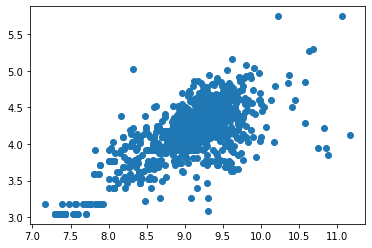

In [126]:
plt.scatter(np.log(train_data['Lot Area']), np.log(train_data['Lot Frontage']));

In [127]:
lot_frontage_slr = LinearRegression()

In [128]:
lf = train_data.dropna(subset=['Lot Frontage'])

In [129]:
lf_x = np.log(lf[['Lot Area']])

In [130]:
lf_y = np.log(lf['Lot Frontage'])

In [131]:
lfx_train, lfx_test, lfy_train, lfy_test = train_test_split(lf_x, lf_y, random_state=34, train_size=0.6)

In [132]:
lot_frontage_slr.fit(lfx_train, lfy_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
cross_val_score(lot_frontage_slr, lfx_train, lfy_train, cv=5).mean()

0.5719377739124819

In [134]:
cross_val_score(lot_frontage_slr, lfx_test, lfy_test, cv=5).mean()

0.5284927116261147

In [135]:
lfy_preds = lot_frontage_slr.predict(lfx_train)

In [136]:
lft_preds = lot_frontage_slr.predict(lfx_test)

In [137]:
lfy_resids = lfy_train - lfy_preds

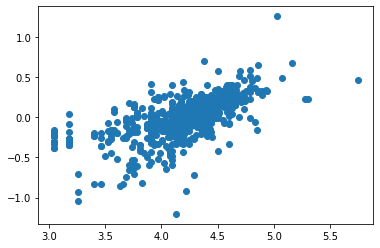

In [138]:
plt.scatter(lfy_train, lfy_resids);

In [139]:
metrics.r2_score(lfy_train, lfy_preds)

0.584493376061161

In [140]:
metrics.r2_score(lfy_test, lft_preds)

0.5480457520735438

In [141]:
train_data.reset_index(inplace = True)

In [142]:
lf_null = train_data['Lot Frontage'].isnull() == True
lf_null_index = train_data.loc[lf_null].index

In [143]:
def fill_lot_frontage(index, dataframe):
    for i in index:
        dataframe['Lot Frontage'][i] = lot_frontage_slr.predict(dataframe[['Lot Area']])[i]

In [144]:
train_data.shape

(2026, 82)

In [145]:
lot_frontage_slr.predict(train_data[['Lot Area']]).shape

(2026,)

In [146]:
lf_null_index

Int64Index([   0,    7,    8,   22,   26,   30,   40,   48,   57,   60,
            ...
            1973, 1976, 1978, 1983, 1990, 1991, 1997, 2003, 2006, 2022],
           dtype='int64', length=324)

In [147]:
fill_lot_frontage(lf_null_index, train_data)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [148]:
train_data['Lot Frontage'].isnull().sum()

0

In [149]:
test_data.reset_index(inplace = True)

In [150]:
test_data.index

RangeIndex(start=0, stop=878, step=1)

In [151]:
test_null = test_data['Lot Frontage'].isnull() == True
test_null_index = test_data.loc[test_null].index

In [152]:
test_null_index

Int64Index([  1,   4,   7,  13,  20,  21,  23,  26,  30,  37,
            ...
            832, 839, 842, 846, 851, 853, 859, 866, 867, 869],
           dtype='int64', length=160)

In [153]:
lot_frontage_slr.predict(test_data[['Lot Area']]).shape

(878,)

In [154]:
test_data.shape

(878, 81)

In [155]:
fill_lot_frontage(test_null_index, test_data)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [156]:
test_data['Lot Frontage'].isnull().sum()

0

### Combining the two dataframes

In [157]:
train_data['split'] = 'Train'
test_data['split'] = 'Test'

In [158]:
combined = train_data.append(test_data, ignore_index = True)

In [159]:
combined.shape

(2904, 83)

In [160]:
train_data.shape

(2026, 83)

In [161]:
test_data.shape

(878, 82)

In [162]:
combined.head()

,index,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,split
0,0,109,533352170,60,RL,7420.122878,13517,Pave,NA,IR1,...,0,0,0,NA,0,3,2010,WD,130500.0,Train
1,1,544,531379050,60,RL,43.000000,11492,Pave,NA,IR1,...,0,0,0,NA,0,4,2009,WD,220000.0,Train
2,2,153,535304180,20,RL,68.000000,7922,Pave,NA,Reg,...,0,0,0,NA,0,1,2010,WD,109000.0,Train
3,3,318,916386060,60,RL,73.000000,9802,Pave,NA,Reg,...,0,0,0,NA,0,4,2010,WD,174000.0,Train
4,4,255,906425045,50,RL,82.000000,14235,Pave,NA,IR1,...,0,0,0,NA,0,3,2010,WD,138500.0,Train
